# Pip Install (if necessary)

In [ ]:
!pip install keras-tuner

# Import Required Packages

In [41]:
from data_creation import DataSelection
from prediction_LSTM import SolarLSTM
import pickle
import numpy as np
import tensorflow as tf
from tensorflow import keras
import shutil

# Build Datasets

In [7]:
rebuild_data = True #Turn to false to skip building datasets

In [9]:
if rebuild_data:
    with open("/content/all_data.pkl", "rb") as file:
        data = pickle.load(file)
    #Extract 2014 data as a training set
    DataSelection(data, 2014, "./", 38)

Num GB used in data array: 0.0019025802612304688
Num GB used in data array: 0.00268399715423584
Num GB used in data array: 0.006217360496520996
Num GB used in data array: 0.011721253395080566
Num GB used in data array: 0.013895630836486816
Num GB used in data array: 0.015526413917541504
Num GB used in data array: 0.016783475875854492
Num GB used in data array: 0.02300083637237549
Num GB used in data array: 0.023374557495117188
Num GB used in data array: 0.026805996894836426
Num GB used in data array: 0.028708577156066895
Num GB used in data array: 0.040463805198669434
Num GB used in data array: 0.0423663854598999
Num GB used in data array: 0.0478363037109375
Num GB used in data array: 0.056092143058776855
Num GB used in data array: 0.05714535713195801
Num GB used in data array: 0.10426819324493408
Num GB used in data array: 0.10912656784057617
Num GB used in data array: 0.10950028896331787
Num GB used in data array: 0.10970413684844971
Num GB used in data array: 0.11109709739685059
Num

In [10]:
if rebuild_data: #Now extract 2015 data using same scale/norm
    with open("/content/norm_scaler.pkl", "rb") as norm_file:
        normalization = pickle.load(norm_file)

    with open("/content/stand_scaler.pkl", "rb") as stand_file:
        standard = pickle.load(stand_file)

    DataSelection(data, 2015,"./", 38, norm_scaler=normalization, stand_scaler=standard)

Num GB used in data array: 0.0019025802612304688
Num GB used in data array: 0.0031256675720214844
Num GB used in data array: 0.010973811149597168
Num GB used in data array: 0.017496943473815918
Num GB used in data array: 0.02415597438812256
Num GB used in data array: 0.03142654895782471
Num GB used in data array: 0.033329129219055176
Num GB used in data array: 0.035231709480285645
Num GB used in data array: 0.04630744457244873
Num GB used in data array: 0.04668116569519043
Num GB used in data array: 0.04759848117828369
Num GB used in data array: 0.05874216556549072
Num GB used in data array: 0.06064474582672119
Num GB used in data array: 0.06152808666229248
Num GB used in data array: 0.07073521614074707
Num GB used in data array: 0.07178843021392822
Num GB used in data array: 0.11503815650939941
Num GB used in data array: 0.12271642684936523
Num GB used in data array: 0.12614786624908447
Num GB used in data array: 0.1263517141342163
Num GB used in data array: 0.12726902961730957
Num GB

# Load Datasets

In [11]:
data2014 = np.load("data_2014.npy")
labels2014 = np.load("labels_2014.npy")
data2014.shape

(25649, 120, 38)

In [12]:
data2015 = np.load("data_2015.npy")
labels2015 = np.load("labels_2015.npy")
data2015.shape

(28486, 120, 38)

# Base Model with All Parameters

In [16]:
base_model = SolarLSTM(data2014, labels2014, save_path="./base_model/base_model.h5")
base_model.build_model()
base_model.model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (64, 120, 16)             3520      
                                                                 
 lstm_3 (LSTM)               (64, 120, 16)             2112      
                                                                 
 dropout_1 (Dropout)         (64, 120, 16)             0         
                                                                 
 dense_1 (Dense)             (64, 120, 1)              17        
                                                                 
Total params: 5,649
Trainable params: 5,649
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


320/320 [==============================] - ETA: 0s - loss: 0.3940 - accuracy: 0.8697 - mse: 0.1151 - mae: 0.2324

INFO:tensorflow:Assets written to: base_model/model_checkpoints/assets


INFO:tensorflow:Assets written to: base_model/model_checkpoints/assets


320/320 [==============================] - 28s 78ms/step - loss: 0.3940 - accuracy: 0.8697 - mse: 0.1151 - mae: 0.2324 - val_loss: 0.5024 - val_accuracy: 0.8217 - val_mse: 0.1531 - val_mae: 0.2372
Epoch 2/50
320/320 [==============================] - 17s 53ms/step - loss: 0.2823 - accuracy: 0.8969 - mse: 0.0800 - mae: 0.1622 - val_loss: 0.5153 - val_accuracy: 0.8245 - val_mse: 0.1486 - val_mae: 0.2210
Epoch 3/50
320/320 [==============================] - 17s 52ms/step - loss: 0.2409 - accuracy: 0.9142 - mse: 0.0663 - mae: 0.1369 - val_loss: 0.6192 - val_accuracy: 0.8183 - val_mse: 0.1657 - val_mae: 0.2012
Epoch 4/50
320/320 [==============================] - 17s 52ms/step - loss: 0.2204 - accuracy: 0.9212 - mse: 0.0606 - mae: 0.1231 - val_loss: 0.5684 - val_accuracy: 0.8144 - val_mse: 0.1542 - val_mae: 0.2058
Epoch 5/50
320/320 [==============================] - 16s 52ms/step - loss: 0.2035 - accuracy: 0.9356 - mse: 0.0543 - mae: 0.1108 - val_loss: 0.6158 - val_accuracy: 0.8159 - val_m

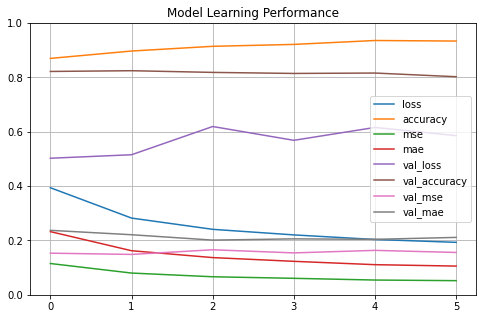

In [17]:
history=base_model.fit()

In [18]:
base_model.save_model(base_model.model)

In [19]:
#Instead of retraining, can load the base model here
base_model = SolarLSTM.load_model("./base_model/base_model.h5")

In [20]:
type(base_model.model)

keras.engine.sequential.Sequential

In [21]:
data_new = base_model.batch_prefetch_data(data2015,labels2015,split_data=False)
base_model.evaluate(data_new)
#base_model.evaluate(data_new,labels_new)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


445/445 [==============================] - 8s 16ms/step - loss: 0.6428 - accuracy: 0.7912 - mse: 0.1705 - mae: 0.2166


[0.6427639722824097,
 0.7911970615386963,
 0.17048847675323486,
 0.21663829684257507]

In [22]:
#Form batches (does not shuffle, cuts off remainder)
batched_2015 = base_model.batch_prefetch_data(data2015,split_data=False)
#Cutoff matching remainder from labels
true_labels = labels2015[:-(labels2015.shape[0]%base_model.batch_size)]

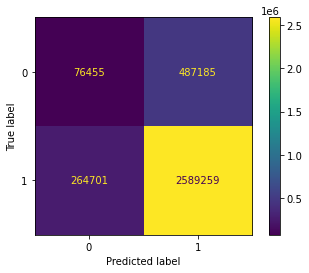

In [23]:
#Do predictions and get confusion matrix
conf_matrix = base_model.predict_conf_matrix(batched_2015,true_labels,make_plots=True)

In [24]:
conf_matrix

array([[  76455,  487185],
       [ 264701, 2589259]])

In [26]:
#If you want to customize the confusion matrix plot, can uncomment below and use the plot handle below
#conf_plt_handle=base_model.plot_confusion_matrix(conf_matrix)

In [27]:
# Example of using the __call__ dunder method to pass data
# call_preds=base_model(batched_2015)

/content/prediction_LSTM.py:219: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.boxplot(np.array([true_positive_logits, false_positive_logits]),


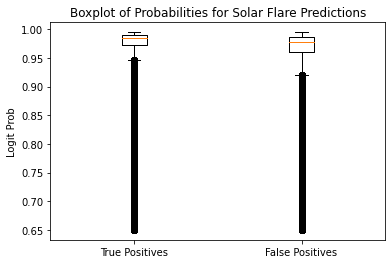

In [25]:
tp_base, fp_base = base_model.view_prediction_distributions(true_labels=true_labels,data=batched_2015)

In [28]:
base_model.calculate_statistics(conf_matrix)

,precision,recall,far,hss
0,0.907251,0.84164,0.775894,0.052207


In [29]:
keras.backend.clear_session()

Trial 10 Complete [00h 02m 48s]
val_accuracy: 0.8287353515625

Best val_accuracy So Far: 0.8324593305587769
Total elapsed time: 00h 57m 41s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Hyper Tuning Complete
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


320/320 [==============================] - ETA: 0s - loss: 0.3810 - accuracy: 0.8609 - mse: 0.1134 - mae: 0.2320

INFO:tensorflow:Assets written to: base_model_tuned/model_checkpoints/assets


INFO:tensorflow:Assets written to: base_model_tuned/model_checkpoints/assets


320/320 [==============================] - 29s 83ms/step - loss: 0.3810 - accuracy: 0.8609 - mse: 0.1134 - mae: 0.2320 - val_loss: 0.5023 - val_accuracy: 0.8090 - val_mse: 0.1548 - val_mae: 0.2518
Epoch 2/50
320/320 [==============================] - 18s 57ms/step - loss: 0.2598 - accuracy: 0.8990 - mse: 0.0734 - mae: 0.1544 - val_loss: 0.6008 - val_accuracy: 0.8071 - val_mse: 0.1667 - val_mae: 0.2146
Epoch 3/50
320/320 [==============================] - 18s 56ms/step - loss: 0.2221 - accuracy: 0.9263 - mse: 0.0600 - mae: 0.1231 - val_loss: 0.7204 - val_accuracy: 0.7982 - val_mse: 0.1833 - val_mae: 0.2142
Epoch 4/50
320/320 [==============================] - 18s 57ms/step - loss: 0.1937 - accuracy: 0.9433 - mse: 0.0497 - mae: 0.1033 - val_loss: 0.6824 - val_accuracy: 0.8118 - val_mse: 0.1715 - val_mae: 0.2022
Epoch 5/50
320/320 [==============================] - 18s 56ms/step - loss: 0.1728 - accuracy: 0.9490 - mse: 0.0432 - mae: 0.0906 - val_loss: 0.7131 - val_accuracy: 0.8072 - val_m

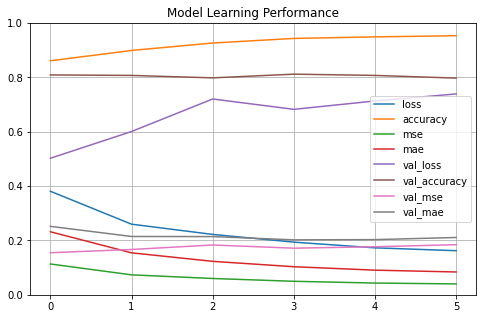

In [31]:
tuned_model = SolarLSTM(data2014, labels2014, "./base_model_tuned/base_model_tuned.h5", tune=True)
tuned_model.fit()

In [32]:
tuned_model.save_model(tuned_model.model)

In [33]:
#Instead of retraining, can load the base model here
# tuned_model = SolarLSTM.load_model("./base_model_tuned/")

In [34]:
#Form batches (does not shuffle, cuts off remainder)
batched_2015 = tuned_model.batch_prefetch_data(data2015,split_data=False)
#Cutoff matching remainder from labels
true_labels = labels2015[:-(labels2015.shape[0]%tuned_model.batch_size)]

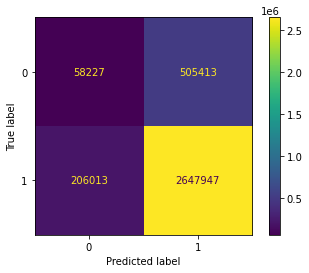

In [35]:
conf_matrix = tuned_model.predict_conf_matrix(batched_2015,true_labels,make_plots=True)

In [36]:
tuned_model.calculate_statistics(conf_matrix)

,precision,recall,far,hss
0,0.927815,0.839722,0.779644,0.04017


In [37]:
tuned_model.model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (64, 120, 16)             3520      
                                                                 
 lstm_3 (LSTM)               (64, 120, 16)             2112      
                                                                 
 dropout_1 (Dropout)         (64, 120, 16)             0         
                                                                 
 dense_1 (Dense)             (64, 120, 1)              17        
                                                                 
Total params: 5,649
Trainable params: 5,649
Non-trainable params: 0
_________________________________________________________________


/content/prediction_LSTM.py:219: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.boxplot(np.array([true_positive_logits, false_positive_logits]),


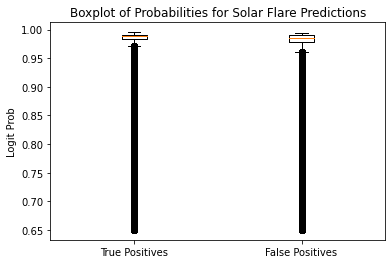

In [38]:
tp_base_tuned, fp_base_tuned = tuned_model.view_prediction_distributions(true_labels=true_labels,data=batched_2015)

# Remove "untitled project" to Create Other Tuned Models

In [42]:
shutil.rmtree('/content/untitled_project')

# Models for ONLY Magnetic Field Parameters

In DataSelection() set the following arguments:

* use_all=False
* select_columns=[magnetic field parameters]

In [43]:
mf_parameters = ["TOTUSJH", "TOTBSQ", "TOTPOT", "TOTUSJZ", "ABSNJZH", "SAVNCPP",
                 "USFLUX", "TOTFZ", "MEANPOT", "EPSZ", "MEANSHR", "SHRGT45", 
                 "MEANGAM", "MEANGBT", "MEANGBZ", "MEANGBH", "MEANJZH", "TOTFY",
                 "MEANJZD", "MEANALP", "TOTFX", "EPSY", "EPSX", "R_VALUE"]

## Creating Data

In [45]:
if rebuild_data:
    with open("/content/all_data.pkl", "rb") as file:
        data = pickle.load(file)

    DataSelection(data, 2014, "./mf/", 24, use_all=False, select_columns=mf_parameters)

Num GB used in data array: 0.001201629638671875
Num GB used in data array: 0.0016951560974121094
Num GB used in data array: 0.003926753997802734
Num GB used in data array: 0.007402896881103516
Num GB used in data array: 0.008776187896728516
Num GB used in data array: 0.009806156158447266
Num GB used in data array: 0.010600090026855469
Num GB used in data array: 0.014526844024658203
Num GB used in data array: 0.01476287841796875
Num GB used in data array: 0.016930103302001953
Num GB used in data array: 0.018131732940673828
Num GB used in data array: 0.025556087493896484
Num GB used in data array: 0.02675771713256836
Num GB used in data array: 0.03021240234375
Num GB used in data array: 0.03542661666870117
Num GB used in data array: 0.03609180450439453
Num GB used in data array: 0.06585359573364258
Num GB used in data array: 0.06892204284667969
Num GB used in data array: 0.06915807723999023
Num GB used in data array: 0.06928682327270508
Num GB used in data array: 0.07016658782958984
Num 

In [46]:
if rebuild_data:
    with open("./mf/norm_scaler.pkl", "rb") as norm_file:
        normalization = pickle.load(norm_file)

    with open("./mf/stand_scaler.pkl", "rb") as stand_file:
        standard = pickle.load(stand_file)

    DataSelection(data, 2015,"./mf/", 24, use_all=False, select_columns=mf_parameters,
                norm_scaler=normalization, stand_scaler=standard)

Num GB used in data array: 0.001201629638671875
Num GB used in data array: 0.0019741058349609375
Num GB used in data array: 0.006930828094482422
Num GB used in data array: 0.011050701141357422
Num GB used in data array: 0.015256404876708984
Num GB used in data array: 0.019848346710205078
Num GB used in data array: 0.021049976348876953
Num GB used in data array: 0.022251605987548828
Num GB used in data array: 0.029246807098388672
Num GB used in data array: 0.02948284149169922
Num GB used in data array: 0.030062198638916016
Num GB used in data array: 0.03710031509399414
Num GB used in data array: 0.038301944732666016
Num GB used in data array: 0.03885984420776367
Num GB used in data array: 0.04467487335205078
Num GB used in data array: 0.04534006118774414
Num GB used in data array: 0.07265567779541016
Num GB used in data array: 0.07750511169433594
Num GB used in data array: 0.07967233657836914
Num GB used in data array: 0.07980108261108398
Num GB used in data array: 0.08038043975830078
N

## Load Data and Run Models

In [47]:
data2014_mf = np.load("./mf/data_2014.npy")
labels2014_mf = np.load("./mf/labels_2014.npy")

In [48]:
data2015_mf = np.load("./mf/data_2015.npy")
labels2015_mf = np.load("./mf/labels_2015.npy")
data2015_mf.shape

(28486, 120, 24)

In [49]:
mf_model = SolarLSTM(data2014_mf, labels2014_mf, "./mf_model/mf_model.h5")

In [50]:
mf_model.build_model()

In [51]:
mf_model.model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (64, 120, 16)             2624      
                                                                 
 lstm_5 (LSTM)               (64, 120, 16)             2112      
                                                                 
 dropout_2 (Dropout)         (64, 120, 16)             0         
                                                                 
 dense_2 (Dense)             (64, 120, 1)              17        
                                                                 
Total params: 4,753
Trainable params: 4,753
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


320/320 [==============================] - ETA: 0s - loss: 0.4155 - accuracy: 0.8587 - mse: 0.1229 - mae: 0.2500

INFO:tensorflow:Assets written to: mf_model/model_checkpoints/assets


INFO:tensorflow:Assets written to: mf_model/model_checkpoints/assets


320/320 [==============================] - 29s 83ms/step - loss: 0.4155 - accuracy: 0.8587 - mse: 0.1229 - mae: 0.2500 - val_loss: 0.4942 - val_accuracy: 0.8094 - val_mse: 0.1556 - val_mae: 0.2577
Epoch 2/50
320/320 [==============================] - 18s 55ms/step - loss: 0.3194 - accuracy: 0.8853 - mse: 0.0905 - mae: 0.1830 - val_loss: 0.4951 - val_accuracy: 0.8094 - val_mse: 0.1541 - val_mae: 0.2381
Epoch 3/50
319/320 [============================>.] - ETA: 0s - loss: 0.2970 - accuracy: 0.8916 - mse: 0.0836 - mae: 0.1675

INFO:tensorflow:Assets written to: mf_model/model_checkpoints/assets


INFO:tensorflow:Assets written to: mf_model/model_checkpoints/assets


320/320 [==============================] - 25s 80ms/step - loss: 0.2963 - accuracy: 0.8919 - mse: 0.0833 - mae: 0.1672 - val_loss: 0.4756 - val_accuracy: 0.8297 - val_mse: 0.1454 - val_mae: 0.2396
Epoch 4/50
320/320 [==============================] - 18s 57ms/step - loss: 0.2743 - accuracy: 0.9122 - mse: 0.0757 - mae: 0.1545 - val_loss: 0.5583 - val_accuracy: 0.8094 - val_mse: 0.1631 - val_mae: 0.2223
Epoch 5/50
320/320 [==============================] - 18s 55ms/step - loss: 0.2600 - accuracy: 0.9174 - mse: 0.0712 - mae: 0.1448 - val_loss: 0.5431 - val_accuracy: 0.8097 - val_mse: 0.1594 - val_mae: 0.2234
Epoch 6/50
320/320 [==============================] - 18s 55ms/step - loss: 0.2350 - accuracy: 0.9251 - mse: 0.0626 - mae: 0.1311 - val_loss: 0.5872 - val_accuracy: 0.7969 - val_mse: 0.1683 - val_mae: 0.2204
Epoch 7/50
320/320 [==============================] - 18s 55ms/step - loss: 0.2220 - accuracy: 0.9347 - mse: 0.0578 - mae: 0.1187 - val_loss: 0.5855 - val_accuracy: 0.8173 - val_m

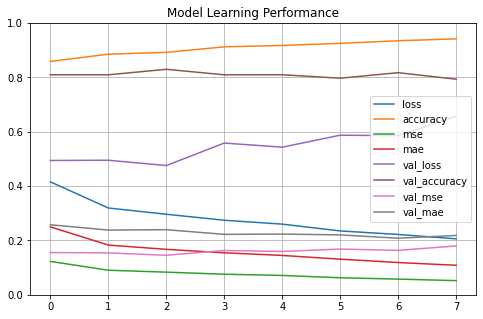

In [52]:
history=mf_model.fit()

In [53]:
mf_model.save_model(mf_model.model)

In [54]:
mf_new = mf_model.batch_prefetch_data(data2015_mf,labels2015_mf,split_data=False)
mf_model.evaluate(mf_new)
#base_model.evaluate(data_new,labels_new)

445/445 [==============================] - 7s 16ms/step - loss: 0.6047 - accuracy: 0.8282 - mse: 0.1572 - mae: 0.1902


[0.6046801209449768, 0.82816481590271, 0.1571582555770874, 0.1902051717042923]

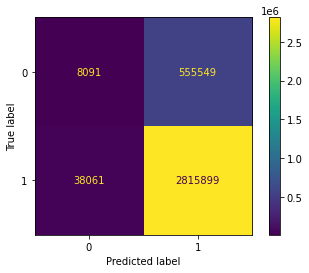

In [55]:
#Form batches (does not shuffle, cuts off remainder)
batched_2015_mf = mf_model.batch_prefetch_data(data2015_mf,split_data=False)
#Cutoff matching remainder from labels
true_labels_mf = labels2015_mf[:-(labels2015_mf.shape[0] % mf_model.batch_size)]
#Do predictions and get confusion matrix
conf_matrix_mf = mf_model.predict_conf_matrix(batched_2015_mf,true_labels_mf,make_plots=True)

In [56]:
conf_matrix_mf

array([[   8091,  555549],
       [  38061, 2815899]])

In [57]:
mf_model.calculate_statistics(conf_matrix_mf)

,precision,recall,far,hss
0,0.986664,0.835219,0.824688,0.001614


/content/prediction_LSTM.py:219: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.boxplot(np.array([true_positive_logits, false_positive_logits]),


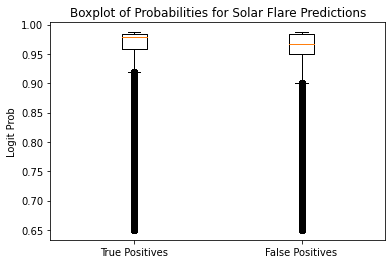

In [58]:
tp_mf, fp_mf = mf_model.view_prediction_distributions(true_labels=true_labels_mf,data=batched_2015_mf)

In [75]:
keras.backend.clear_session()

In [76]:
tuned_model_mf = SolarLSTM(data2014_mf, labels2014_mf, "./mf_model_tuned/mf_model_tuned.h5", tune=True)

Trial 10 Complete [00h 10m 39s]
val_accuracy: 0.8124886155128479

Best val_accuracy So Far: 0.8160449266433716
Total elapsed time: 01h 57m 08s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Hyper Tuning Complete
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


320/320 [==============================] - ETA: 0s - loss: 0.3656 - accuracy: 0.8741 - mse: 0.1060 - mae: 0.1970

INFO:tensorflow:Assets written to: mf_model_tuned/model_checkpoints/assets


INFO:tensorflow:Assets written to: mf_model_tuned/model_checkpoints/assets


320/320 [==============================] - 47s 139ms/step - loss: 0.3656 - accuracy: 0.8741 - mse: 0.1060 - mae: 0.1970 - val_loss: 0.8621 - val_accuracy: 0.8094 - val_mse: 0.1860 - val_mae: 0.1991
Epoch 2/50
320/320 [==============================] - ETA: 0s - loss: 0.3140 - accuracy: 0.8939 - mse: 0.0884 - mae: 0.1660

INFO:tensorflow:Assets written to: mf_model_tuned/model_checkpoints/assets


INFO:tensorflow:Assets written to: mf_model_tuned/model_checkpoints/assets


320/320 [==============================] - 44s 138ms/step - loss: 0.3140 - accuracy: 0.8939 - mse: 0.0884 - mae: 0.1660 - val_loss: 0.8342 - val_accuracy: 0.8094 - val_mse: 0.1854 - val_mae: 0.1975
Epoch 3/50
320/320 [==============================] - ETA: 0s - loss: 0.3178 - accuracy: 0.8955 - mse: 0.0874 - mae: 0.1695

INFO:tensorflow:Assets written to: mf_model_tuned/model_checkpoints/assets


INFO:tensorflow:Assets written to: mf_model_tuned/model_checkpoints/assets


320/320 [==============================] - 43s 135ms/step - loss: 0.3178 - accuracy: 0.8955 - mse: 0.0874 - mae: 0.1695 - val_loss: 0.6623 - val_accuracy: 0.8094 - val_mse: 0.1776 - val_mae: 0.2082
Epoch 4/50
320/320 [==============================] - 36s 112ms/step - loss: 0.2930 - accuracy: 0.9015 - mse: 0.0804 - mae: 0.1598 - val_loss: 0.7011 - val_accuracy: 0.8094 - val_mse: 0.1799 - val_mae: 0.2059
Epoch 5/50
320/320 [==============================] - ETA: 0s - loss: 0.2747 - accuracy: 0.9212 - mse: 0.0734 - mae: 0.1508

INFO:tensorflow:Assets written to: mf_model_tuned/model_checkpoints/assets


INFO:tensorflow:Assets written to: mf_model_tuned/model_checkpoints/assets


320/320 [==============================] - 43s 133ms/step - loss: 0.2747 - accuracy: 0.9212 - mse: 0.0734 - mae: 0.1508 - val_loss: 0.6621 - val_accuracy: 0.8094 - val_mse: 0.1762 - val_mae: 0.2059
Epoch 6/50
320/320 [==============================] - ETA: 0s - loss: 0.3108 - accuracy: 0.8898 - mse: 0.0889 - mae: 0.1700

INFO:tensorflow:Assets written to: mf_model_tuned/model_checkpoints/assets


INFO:tensorflow:Assets written to: mf_model_tuned/model_checkpoints/assets


320/320 [==============================] - 44s 138ms/step - loss: 0.3108 - accuracy: 0.8898 - mse: 0.0889 - mae: 0.1700 - val_loss: 0.5698 - val_accuracy: 0.8094 - val_mse: 0.1627 - val_mae: 0.2180
Epoch 7/50
320/320 [==============================] - 36s 112ms/step - loss: 0.3012 - accuracy: 0.8945 - mse: 0.0864 - mae: 0.1654 - val_loss: 0.6941 - val_accuracy: 0.8094 - val_mse: 0.1754 - val_mae: 0.2038
Epoch 8/50
320/320 [==============================] - 36s 112ms/step - loss: 0.2860 - accuracy: 0.8882 - mse: 0.0800 - mae: 0.1586 - val_loss: 0.6072 - val_accuracy: 0.8094 - val_mse: 0.1644 - val_mae: 0.2132
Epoch 9/50
320/320 [==============================] - 35s 110ms/step - loss: 0.2660 - accuracy: 0.8995 - mse: 0.0736 - mae: 0.1473 - val_loss: 0.6641 - val_accuracy: 0.8094 - val_mse: 0.1761 - val_mae: 0.2072
Epoch 10/50
320/320 [==============================] - 35s 110ms/step - loss: 0.2578 - accuracy: 0.9184 - mse: 0.0698 - mae: 0.1399 - val_loss: 0.6762 - val_accuracy: 0.8093 -

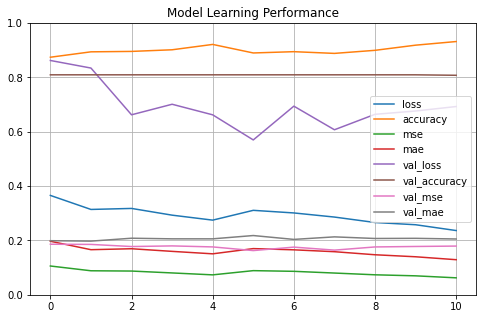

In [77]:
tuned_model_mf.fit()

In [78]:
tuned_model_mf.save_model(tuned_model_mf.model)

In [79]:
# Form batches (does not shuffle, cuts off remainder)
batched_2015_mf_tuned = tuned_model_mf.batch_prefetch_data(data2015_mf,split_data=False)
# Cutoff matching remainder from labels
true_labels_mf_tuned = labels2015_mf[:-(labels2015_mf.shape[0]%tuned_model_mf.batch_size)]

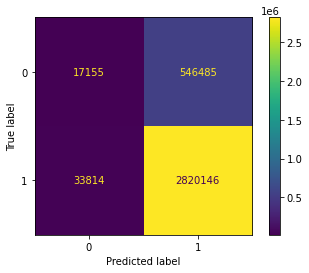

In [80]:
conf_matrix = tuned_model_mf.predict_conf_matrix(batched_2015_mf_tuned,true_labels_mf_tuned,make_plots=True)

In [81]:
tuned_model_mf.calculate_statistics(conf_matrix)

,precision,recall,far,hss
0,0.988152,0.837676,0.663423,0.029283


In [82]:
tuned_model_mf.model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (64, 120, 64)             22784     
                                                                 
 lstm_3 (LSTM)               (64, 120, 64)             33024     
                                                                 
 dropout_1 (Dropout)         (64, 120, 64)             0         
                                                                 
 dense_1 (Dense)             (64, 120, 1)              65        
                                                                 
Total params: 55,873
Trainable params: 55,873
Non-trainable params: 0
_________________________________________________________________


/content/prediction_LSTM.py:219: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.boxplot(np.array([true_positive_logits, false_positive_logits]),


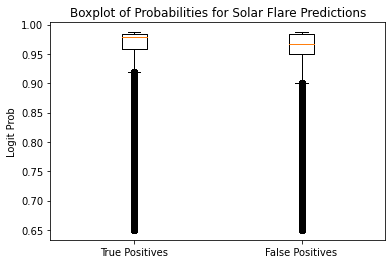

In [83]:
tp_tuned_mf, fp_tuned_mf = mf_model.view_prediction_distributions(true_labels=true_labels_mf_tuned,data=batched_2015_mf_tuned)

In [84]:
keras.backend.clear_session()

In [85]:
shutil.rmtree('/content/untitled_project')

# Feature Selection Model

In [86]:
if rebuild_data:
    with open("/content/all_data.pkl", "rb") as file:
        data = pickle.load(file)
    DataSelection(data, 2014, "./fs/", feature_selection=True, use_all=False)

Num GB used in data array: 0.0006008148193359375
Num GB used in data array: 0.0008475780487060547
Num GB used in data array: 0.001963376998901367
Num GB used in data array: 0.003701448440551758
Num GB used in data array: 0.004388093948364258
Num GB used in data array: 0.004903078079223633
Num GB used in data array: 0.005300045013427734
Num GB used in data array: 0.0072634220123291016
Num GB used in data array: 0.007381439208984375
Num GB used in data array: 0.008465051651000977
Num GB used in data array: 0.009065866470336914
Num GB used in data array: 0.012778043746948242
Num GB used in data array: 0.01337885856628418
Num GB used in data array: 0.015106201171875
Num GB used in data array: 0.017713308334350586
Num GB used in data array: 0.018045902252197266
Num GB used in data array: 0.03292679786682129
Num GB used in data array: 0.034461021423339844
Num GB used in data array: 0.03457903861999512
Num GB used in data array: 0.03464341163635254
Num GB used in data array: 0.035083293914794

In [87]:
if rebuild_data:
    with open("./fs/norm_scaler.pkl", "rb") as norm_file:
        normalization = pickle.load(norm_file)

    with open("./fs/stand_scaler.pkl", "rb") as stand_file:
        standard = pickle.load(stand_file)

    DataSelection(data, 2015,"./fs/", feature_selection=True, use_all=False, norm_scaler=normalization, stand_scaler=standard)

Num GB used in data array: 0.0006008148193359375
Num GB used in data array: 0.0009870529174804688
Num GB used in data array: 0.003465414047241211
Num GB used in data array: 0.005525350570678711
Num GB used in data array: 0.007628202438354492
Num GB used in data array: 0.009924173355102539
Num GB used in data array: 0.010524988174438477
Num GB used in data array: 0.011125802993774414
Num GB used in data array: 0.014623403549194336
Num GB used in data array: 0.01474142074584961
Num GB used in data array: 0.015031099319458008
Num GB used in data array: 0.01855015754699707
Num GB used in data array: 0.019150972366333008
Num GB used in data array: 0.019429922103881836
Num GB used in data array: 0.02233743667602539
Num GB used in data array: 0.02267003059387207
Num GB used in data array: 0.03632783889770508
Num GB used in data array: 0.03875255584716797
Num GB used in data array: 0.03983616828918457
Num GB used in data array: 0.03990054130554199
Num GB used in data array: 0.04019021987915039

In [88]:
data2014_sf = np.load("./fs/data_2014.npy")
labels2014_sf = np.load("./fs/labels_2014.npy")
data2014_sf.shape

(25649, 120, 12)

In [89]:
data2015_sf = np.load("./fs/data_2015.npy")
labels2015_sf = np.load("./fs/labels_2015.npy")
data2015_sf.shape

(28486, 120, 12)

In [90]:
fs_model = SolarLSTM(data2014_sf, labels2014_sf, "./fs_model/fs_model.h5")
fs_model.build_model()
fs_model.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (64, 120, 16)             1856      
                                                                 
 lstm_1 (LSTM)               (64, 120, 16)             2112      
                                                                 
 dropout (Dropout)           (64, 120, 16)             0         
                                                                 
 dense (Dense)               (64, 120, 1)              17        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


320/320 [==============================] - ETA: 0s - loss: 0.3647 - accuracy: 0.8814 - mse: 0.1065 - mae: 0.2140

INFO:tensorflow:Assets written to: fs_model/model_checkpoints/assets


INFO:tensorflow:Assets written to: fs_model/model_checkpoints/assets


320/320 [==============================] - 27s 74ms/step - loss: 0.3647 - accuracy: 0.8814 - mse: 0.1065 - mae: 0.2140 - val_loss: 0.6004 - val_accuracy: 0.8094 - val_mse: 0.1691 - val_mae: 0.2276
Epoch 2/50
320/320 [==============================] - 17s 53ms/step - loss: 0.2816 - accuracy: 0.8929 - mse: 0.0785 - mae: 0.1539 - val_loss: 0.6352 - val_accuracy: 0.7760 - val_mse: 0.1770 - val_mae: 0.2426
Epoch 3/50
320/320 [==============================] - 16s 51ms/step - loss: 0.2690 - accuracy: 0.9083 - mse: 0.0730 - mae: 0.1451 - val_loss: 0.6218 - val_accuracy: 0.7648 - val_mse: 0.1764 - val_mae: 0.2414
Epoch 4/50
320/320 [==============================] - 17s 52ms/step - loss: 0.2725 - accuracy: 0.9158 - mse: 0.0736 - mae: 0.1430 - val_loss: 0.6013 - val_accuracy: 0.7980 - val_mse: 0.1702 - val_mae: 0.2289
Epoch 5/50
320/320 [==============================] - 17s 54ms/step - loss: 0.2579 - accuracy: 0.9182 - mse: 0.0705 - mae: 0.1411 - val_loss: 0.6389 - val_accuracy: 0.7618 - val_m

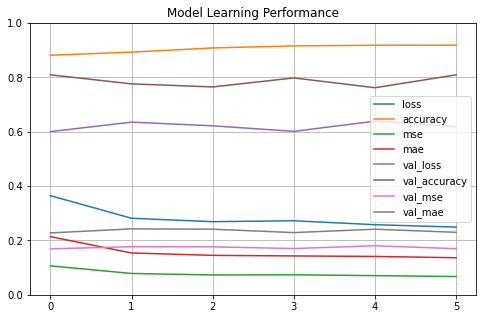

In [91]:
history=fs_model.fit()

In [92]:
fs_model.save_model(fs_model.model)

In [93]:
fs_new = fs_model.batch_prefetch_data(data2015_sf,labels2015_sf,split_data=False)
fs_model.evaluate(fs_new)
#base_model.evaluate(data_new,labels_new)

445/445 [==============================] - 7s 16ms/step - loss: 0.5386 - accuracy: 0.8355 - mse: 0.1490 - mae: 0.2149


[0.5385933518409729,
 0.8354939222335815,
 0.14895488321781158,
 0.2149001806974411]

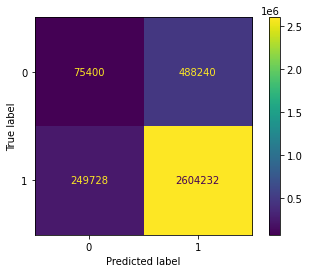

In [94]:
#Form batches (does not shuffle, cuts off remainder)
batched_2015_sf = fs_model.batch_prefetch_data(data2015_sf,split_data=False)
#Cutoff matching remainder from labels
true_labels_sf = labels2015_sf[:-(labels2015_sf.shape[0] % fs_model.batch_size)]
#Do predictions and get confusion matrix
conf_matrix_sf = fs_model.predict_conf_matrix(batched_2015_sf,true_labels_sf,make_plots=True)

In [95]:
conf_matrix_sf

array([[  75400,  488240],
       [ 249728, 2604232]])

In [96]:
fs_model.calculate_statistics(conf_matrix_sf)

,precision,recall,far,hss
0,0.912498,0.84212,0.768091,0.056943


/content/prediction_LSTM.py:219: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.boxplot(np.array([true_positive_logits, false_positive_logits]),


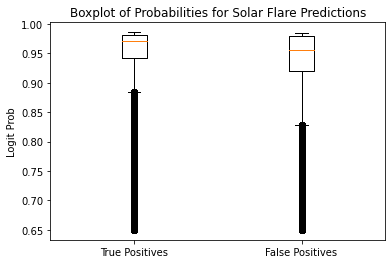

In [97]:
tp_fs, fp_fs = fs_model.view_prediction_distributions(true_labels=true_labels_sf,data=batched_2015_sf)

In [98]:
keras.backend.clear_session()

In [99]:
tuned_fs_model = SolarLSTM(data2014_sf, labels2014_sf, "./fs_model_tuned/fs_model_tuned.h5", tune=True)

In [100]:
tuned_fs_model.build_model()

Trial 10 Complete [00h 21m 14s]
val_accuracy: 0.809374988079071

Best val_accuracy So Far: 0.8096386790275574
Total elapsed time: 02h 30m 09s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Hyper Tuning Complete
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


320/320 [==============================] - ETA: 0s - loss: 0.3833 - accuracy: 0.8951 - mse: 0.1055 - mae: 0.1964

INFO:tensorflow:Assets written to: fs_model_tuned/model_checkpoints/assets


INFO:tensorflow:Assets written to: fs_model_tuned/model_checkpoints/assets


320/320 [==============================] - 81s 246ms/step - loss: 0.3833 - accuracy: 0.8951 - mse: 0.1055 - mae: 0.1964 - val_loss: 0.7557 - val_accuracy: 0.8094 - val_mse: 0.1831 - val_mae: 0.2033
Epoch 2/50
320/320 [==============================] - ETA: 0s - loss: 0.3442 - accuracy: 0.8996 - mse: 0.0946 - mae: 0.1813

INFO:tensorflow:Assets written to: fs_model_tuned/model_checkpoints/assets


INFO:tensorflow:Assets written to: fs_model_tuned/model_checkpoints/assets


320/320 [==============================] - 77s 239ms/step - loss: 0.3442 - accuracy: 0.8996 - mse: 0.0946 - mae: 0.1813 - val_loss: 0.6999 - val_accuracy: 0.8094 - val_mse: 0.1805 - val_mae: 0.2087
Epoch 3/50
320/320 [==============================] - ETA: 0s - loss: 0.3575 - accuracy: 0.8996 - mse: 0.0978 - mae: 0.1910

INFO:tensorflow:Assets written to: fs_model_tuned/model_checkpoints/assets


INFO:tensorflow:Assets written to: fs_model_tuned/model_checkpoints/assets


320/320 [==============================] - 76s 237ms/step - loss: 0.3575 - accuracy: 0.8996 - mse: 0.0978 - mae: 0.1910 - val_loss: 0.5184 - val_accuracy: 0.8094 - val_mse: 0.1614 - val_mae: 0.2545
Epoch 4/50
320/320 [==============================] - 69s 216ms/step - loss: 0.3371 - accuracy: 0.8996 - mse: 0.0930 - mae: 0.1853 - val_loss: 0.6064 - val_accuracy: 0.8094 - val_mse: 0.1736 - val_mae: 0.2224
Epoch 5/50
320/320 [==============================] - 68s 212ms/step - loss: 0.3225 - accuracy: 0.8996 - mse: 0.0881 - mae: 0.1745 - val_loss: 0.5725 - val_accuracy: 0.8094 - val_mse: 0.1698 - val_mae: 0.2311
Epoch 6/50
320/320 [==============================] - 68s 214ms/step - loss: 0.3109 - accuracy: 0.8996 - mse: 0.0848 - mae: 0.1689 - val_loss: 0.5813 - val_accuracy: 0.8094 - val_mse: 0.1712 - val_mae: 0.2297
Epoch 7/50
320/320 [==============================] - 69s 215ms/step - loss: 0.3004 - accuracy: 0.8995 - mse: 0.0815 - mae: 0.1633 - val_loss: 0.6113 - val_accuracy: 0.8094 - 

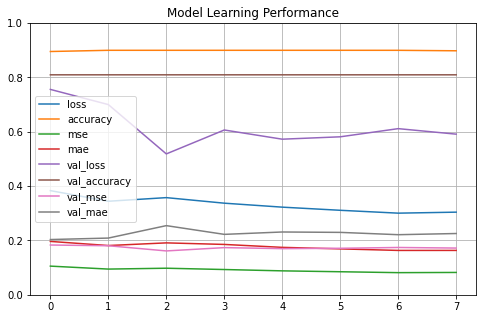

In [101]:
history=tuned_fs_model.fit()

In [102]:
tuned_fs_model.save_model(tuned_fs_model.model)

In [103]:
tuned_fs_new = tuned_fs_model.batch_prefetch_data(data2015_sf,labels2015_sf,split_data=False)
tuned_fs_model.evaluate(tuned_fs_new)
#base_model.evaluate(data_new,labels_new)

445/445 [==============================] - 36s 81ms/step - loss: 0.4916 - accuracy: 0.8317 - mse: 0.1431 - mae: 0.2049


[0.49163687229156494,
 0.8316552639007568,
 0.14313945174217224,
 0.2049296796321869]

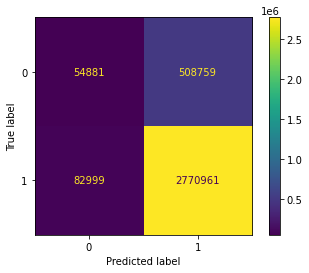

In [104]:
#Form batches (does not shuffle, cuts off remainder)
batched_2015_tuned_sf = tuned_fs_model.batch_prefetch_data(data2015_sf,split_data=False)
#Cutoff matching remainder from labels
true_labels_tuned_sf = labels2015_sf[:-(labels2015_sf.shape[0] % tuned_fs_model.batch_size)]
#Do predictions and get confusion matrix
conf_matrix_tuned_sf = tuned_fs_model.predict_conf_matrix(batched_2015_tuned_sf,true_labels_tuned_sf,make_plots=True)

In [105]:
conf_matrix_tuned_sf

array([[  54881,  508759],
       [  82999, 2770961]])

In [106]:
tuned_fs_model.calculate_statistics(conf_matrix_tuned_sf)

,precision,recall,far,hss
0,0.970918,0.844877,0.601965,0.098156


In [107]:
tuned_fs_model.model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (64, 120, 112)            56000     
                                                                 
 lstm_3 (LSTM)               (64, 120, 112)            100800    
                                                                 
 dropout_1 (Dropout)         (64, 120, 112)            0         
                                                                 
 dense_1 (Dense)             (64, 120, 1)              113       
                                                                 
Total params: 156,913
Trainable params: 156,913
Non-trainable params: 0
_________________________________________________________________


/content/prediction_LSTM.py:219: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.boxplot(np.array([true_positive_logits, false_positive_logits]),


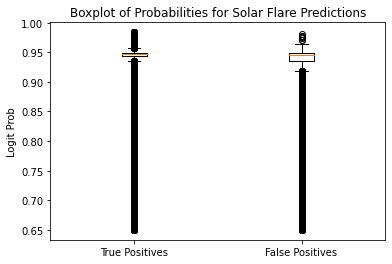

In [108]:
tp_tuned_fs, fp_tuned_fs = tuned_fs_model.view_prediction_distributions(true_labels=true_labels_tuned_sf,data=batched_2015_tuned_sf)

In [109]:
keras.backend.clear_session()

In [110]:
shutil.rmtree('/content/untitled_project')

# Model with Recurrent Dropout and Lower Units Tuning

* Using feature selection
* Tuning with units from 10 to 16 with step size 1
* Removed the Dropout layer and instead used the recurrent_dropout = .2 in the keras.layers.LSTM function call

In [111]:
if rebuild_data:
    with open("/content/all_data.pkl", "rb") as file:
        data = pickle.load(file)
    DataSelection(data, 2014, "./dropout/", feature_selection=True, use_all=False)
# DataSelection(data, 2015, "./")

Num GB used in data array: 0.0006008148193359375
Num GB used in data array: 0.0008475780487060547
Num GB used in data array: 0.001963376998901367
Num GB used in data array: 0.003701448440551758
Num GB used in data array: 0.004388093948364258
Num GB used in data array: 0.004903078079223633
Num GB used in data array: 0.005300045013427734
Num GB used in data array: 0.0072634220123291016
Num GB used in data array: 0.007381439208984375
Num GB used in data array: 0.008465051651000977
Num GB used in data array: 0.009065866470336914
Num GB used in data array: 0.012778043746948242
Num GB used in data array: 0.01337885856628418
Num GB used in data array: 0.015106201171875
Num GB used in data array: 0.017713308334350586
Num GB used in data array: 0.018045902252197266
Num GB used in data array: 0.03292679786682129
Num GB used in data array: 0.034461021423339844
Num GB used in data array: 0.03457903861999512
Num GB used in data array: 0.03464341163635254
Num GB used in data array: 0.035083293914794

In [112]:
if rebuild_data:
    with open("./dropout/norm_scaler.pkl", "rb") as norm_file:
        normalization = pickle.load(norm_file)

    with open("./dropout/stand_scaler.pkl", "rb") as stand_file:
        standard = pickle.load(stand_file)

    DataSelection(data, 2015,"./dropout/", feature_selection=True, use_all=False, norm_scaler=normalization, stand_scaler=standard)

Num GB used in data array: 0.0006008148193359375
Num GB used in data array: 0.0009870529174804688
Num GB used in data array: 0.003465414047241211
Num GB used in data array: 0.005525350570678711
Num GB used in data array: 0.007628202438354492
Num GB used in data array: 0.009924173355102539
Num GB used in data array: 0.010524988174438477
Num GB used in data array: 0.011125802993774414
Num GB used in data array: 0.014623403549194336
Num GB used in data array: 0.01474142074584961
Num GB used in data array: 0.015031099319458008
Num GB used in data array: 0.01855015754699707
Num GB used in data array: 0.019150972366333008
Num GB used in data array: 0.019429922103881836
Num GB used in data array: 0.02233743667602539
Num GB used in data array: 0.02267003059387207
Num GB used in data array: 0.03632783889770508
Num GB used in data array: 0.03875255584716797
Num GB used in data array: 0.03983616828918457
Num GB used in data array: 0.03990054130554199
Num GB used in data array: 0.04019021987915039

In [113]:
data2014_sf = np.load("./dropout/data_2014.npy")
labels2014_sf = np.load("./dropout/labels_2014.npy")
data2014_sf.shape

(25649, 120, 12)

In [114]:
data2015_sf = np.load("./dropout/data_2015.npy")
labels2015_sf = np.load("./dropout/labels_2015.npy")
data2015_sf.shape

(28486, 120, 12)

In [115]:
model3 = SolarLSTM(data2014_sf, labels2014_sf, "./dropout_model/dropout_model.h5", tune=True,
                   units=(10, 16, 1), regularization=("early stopping"))

In [116]:
model3.build_model()

In [117]:
model3.model

Trial 10 Complete [00h 01m 55s]
val_accuracy: 0.809374988079071

Best val_accuracy So Far: 0.8230029344558716
Total elapsed time: 00h 22m 44s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Hyper Tuning Complete
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


320/320 [==============================] - ETA: 0s - loss: 0.3572 - accuracy: 0.8828 - mse: 0.1063 - mae: 0.2298

INFO:tensorflow:Assets written to: dropout_model/model_checkpoints/assets


INFO:tensorflow:Assets written to: dropout_model/model_checkpoints/assets


320/320 [==============================] - 27s 76ms/step - loss: 0.3572 - accuracy: 0.8828 - mse: 0.1063 - mae: 0.2298 - val_loss: 0.5999 - val_accuracy: 0.8094 - val_mse: 0.1711 - val_mae: 0.2305
Epoch 2/50
320/320 [==============================] - 17s 53ms/step - loss: 0.2684 - accuracy: 0.8979 - mse: 0.0751 - mae: 0.1467 - val_loss: 0.6333 - val_accuracy: 0.7849 - val_mse: 0.1759 - val_mae: 0.2356
Epoch 3/50
320/320 [==============================] - ETA: 0s - loss: 0.2624 - accuracy: 0.9118 - mse: 0.0713 - mae: 0.1404

INFO:tensorflow:Assets written to: dropout_model/model_checkpoints/assets


INFO:tensorflow:Assets written to: dropout_model/model_checkpoints/assets


320/320 [==============================] - 24s 76ms/step - loss: 0.2624 - accuracy: 0.9118 - mse: 0.0713 - mae: 0.1404 - val_loss: 0.5834 - val_accuracy: 0.7990 - val_mse: 0.1657 - val_mae: 0.2282
Epoch 4/50
320/320 [==============================] - 16s 51ms/step - loss: 0.2549 - accuracy: 0.9139 - mse: 0.0695 - mae: 0.1383 - val_loss: 0.6276 - val_accuracy: 0.7460 - val_mse: 0.1854 - val_mae: 0.2619
Epoch 5/50
320/320 [==============================] - 16s 51ms/step - loss: 0.2497 - accuracy: 0.9145 - mse: 0.0688 - mae: 0.1385 - val_loss: 0.5954 - val_accuracy: 0.8035 - val_mse: 0.1665 - val_mae: 0.2233
Epoch 6/50
320/320 [==============================] - 16s 52ms/step - loss: 0.2351 - accuracy: 0.9230 - mse: 0.0642 - mae: 0.1297 - val_loss: 0.5929 - val_accuracy: 0.8044 - val_mse: 0.1653 - val_mae: 0.2209
Epoch 7/50
320/320 [==============================] - 17s 52ms/step - loss: 0.2203 - accuracy: 0.9259 - mse: 0.0604 - mae: 0.1229 - val_loss: 0.6213 - val_accuracy: 0.8004 - val_m

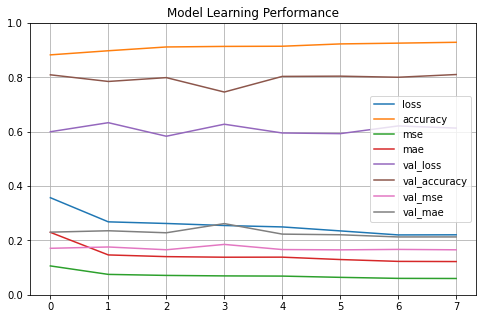

In [118]:
history=model3.fit()

In [119]:
model3.save_model(model3.model)

In [120]:
new3 = model3.batch_prefetch_data(data2015_sf,labels2015_sf,split_data=False)
model3.evaluate(new3)
#base_model.evaluate(data_new,labels_new)

445/445 [==============================] - 7s 16ms/step - loss: 0.5633 - accuracy: 0.8234 - mse: 0.1519 - mae: 0.2015


[0.5633033514022827,
 0.8234372138977051,
 0.15189151465892792,
 0.20153960585594177]

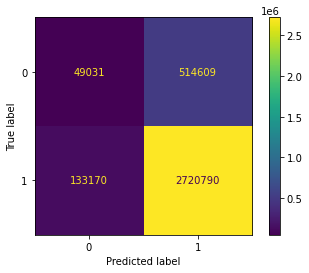

In [121]:
#Form batches (does not shuffle, cuts off remainder)
batched_2015_3 = model3.batch_prefetch_data(data2015_sf,split_data=False)
#Cutoff matching remainder from labels
true_labels_3 = labels2015_sf[:-(labels2015_sf.shape[0] % model3.batch_size)]
#Do predictions and get confusion matrix
conf_matrix_3 = model3.predict_conf_matrix(batched_2015_3,true_labels_3,make_plots=True)

In [122]:
conf_matrix_3

array([[  49031,  514609],
       [ 133170, 2720790]])

In [123]:
model3.calculate_statistics(conf_matrix_3)

,precision,recall,far,hss
0,0.953339,0.840944,0.730896,0.055726


In [124]:
true_labels_3.shape

(28480, 120, 1)

/content/prediction_LSTM.py:219: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.boxplot(np.array([true_positive_logits, false_positive_logits]),


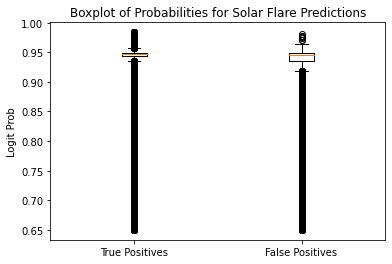

In [125]:
tp_model3, fp_model3 = tuned_fs_model.view_prediction_distributions(true_labels=true_labels_3,data=batched_2015_3)

In [126]:
shutil.rmtree('/content/untitled_project')

# Download Files from Google Colab (if necessary)

In [127]:
from google.colab import drive

In [129]:
drive.mount('/content/drive')

Mounted at /content/drive


In [130]:
drive.flush_and_unmount()